In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer

In [3]:
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Vishnu Priya
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
import os

# Set the path to the folder containing the CSV files
folder_path = r"C:\Users\Vishnu Priya M\OneDrive\Documents\jupyter_demo\archive"

# Specify the file names
validation_filename = "twitter_validation.csv"

# Construct the full paths
validation_filepath = os.path.join(folder_path, validation_filename)

# Read the CSV files into DataFrames
df_validation = pd.read_csv(validation_filepath)


In [5]:
print(df_validation.head())


     Id   Platform   Sentiment  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                                Text  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...  
3  CSGO matchmaking is so full of closet hacking,...  
4  Now the President is slapping Americans in the...  


In [6]:
print(df_validation.columns)


Index(['Id', 'Platform', 'Sentiment', 'Text'], dtype='object')


In [7]:
# Print column names
print(df_validation.columns)

# Print the first few rows of the DataFrame
print(df_validation.head())


Index(['Id', 'Platform', 'Sentiment', 'Text'], dtype='object')
     Id   Platform   Sentiment  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                                Text  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...  
3  CSGO matchmaking is so full of closet hacking,...  
4  Now the President is slapping Americans in the...  


In [8]:
# Sentiment Analysis for 'twitter_validation'
sia = SentimentIntensityAnalyzer()
df_validation['compound'] = df_validation[df_validation.columns[-1]].apply(lambda x: sia.polarity_scores(x)['compound'])


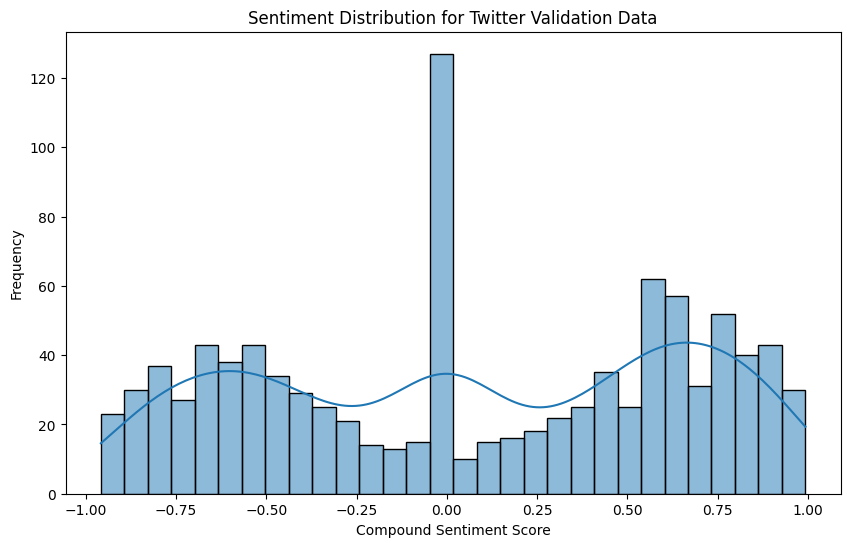

In [9]:
# Visualize Sentiment Distribution for 'twitter_validation'
plt.figure(figsize=(10, 6))
sns.histplot(df_validation['compound'], bins=30, kde=True)
plt.title('Sentiment Distribution for Twitter Validation Data')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()

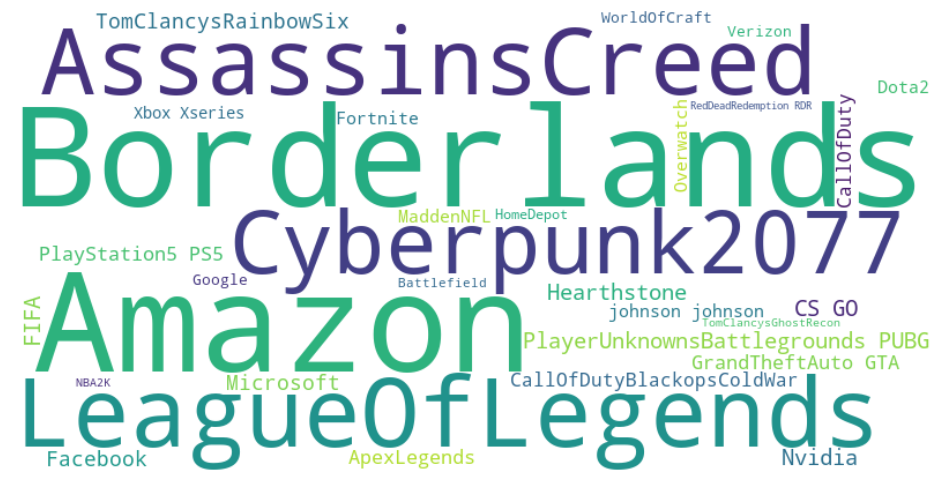

In [86]:
# Identify the text column dynamically
text_columns = [col for col in df_validation.columns if df_validation[col].dtype == 'O']  # Assuming text columns are of object type

# Check if there are text columns
if text_columns:
    # Use the first text column found, you may adjust this based on your specific DataFrame structure
    text_column = text_columns[0]

    # Extracting positive tweets text
    positive_tweets_text = df_validation[df_validation['compound'] > 0][text_column]

    # Joining positive tweets text into a single string
    positive_tweets = ' '.join(positive_tweets_text)

    # Word Cloud for Positive Sentiments
    if positive_tweets.strip():
        wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
        plt.figure(figsize=(12, 6))
        plt.imshow(wordcloud_positive, interpolation='bilinear')
        plt.axis('off')
        plt.show()
else:
    print("No text columns found.")


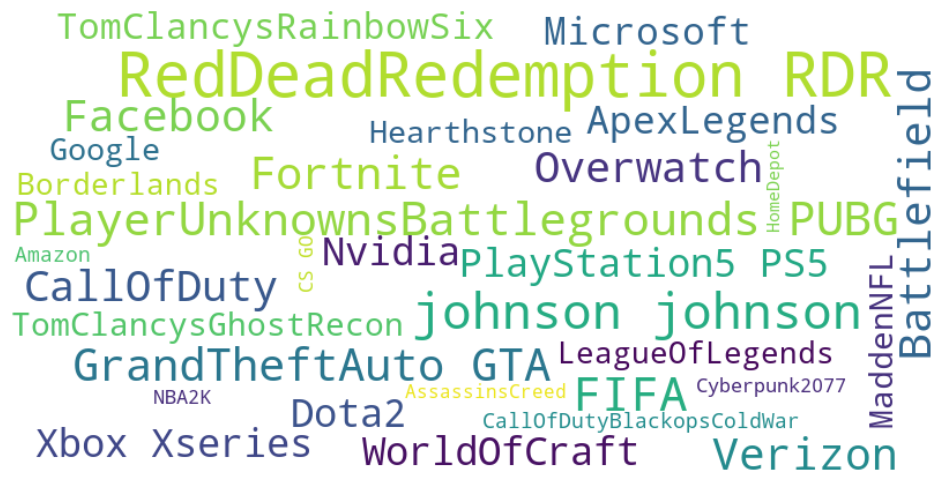

In [87]:
# Check if there are text columns
if text_columns:
    # Use the first text column found, you may adjust this based on your specific DataFrame structure
    text_column = text_columns[0]

    # Extracting negative tweets text
    negative_tweets_text = df_validation[df_validation['compound'] < 0][text_column]

    # Joining negative tweets text into a single string
    negative_tweets = ' '.join(negative_tweets_text)

    # Word Cloud for Negative Sentiments
    if negative_tweets.strip():
        wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)
        plt.figure(figsize=(12, 6))
        plt.imshow(wordcloud_negative, interpolation='bilinear')
        plt.axis('off')
        plt.show()
    else:
        print("No negative tweets found.")
else:
    print("No text columns found.")


(-0.5, 799.5, 399.5, -0.5)

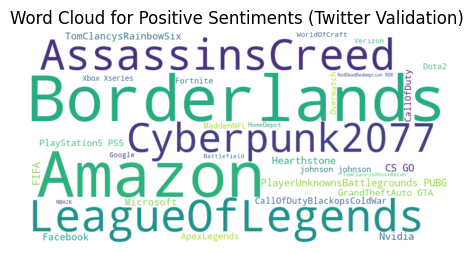

In [88]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiments (Twitter Validation)')
plt.axis('off')

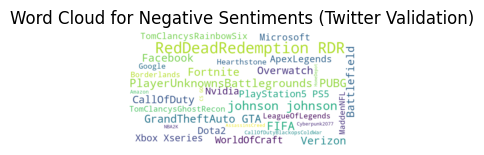

In [89]:
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiments (Twitter Validation)')
plt.axis('off')

plt.show()

In [90]:
# Assuming column names
columns = ['ID', 'Platform', 'Sentiment', 'Text']


In [91]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'Text' is the column with text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_validation['Text'])


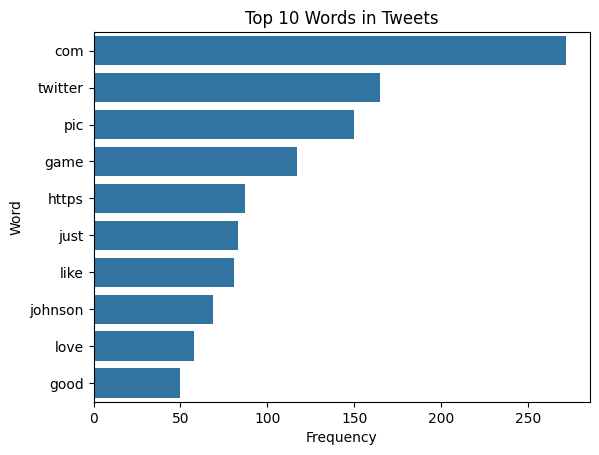

In [93]:
# Get the top N words
N = 10
word_freq = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])
top_words = sorted(word_freq, key=lambda x: x[1], reverse=True)[:N]

# Plot the top N words
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
sns.barplot(x='Frequency', y='Word', data=top_words_df)
plt.title(f'Top {N} Words in Tweets')
plt.show()

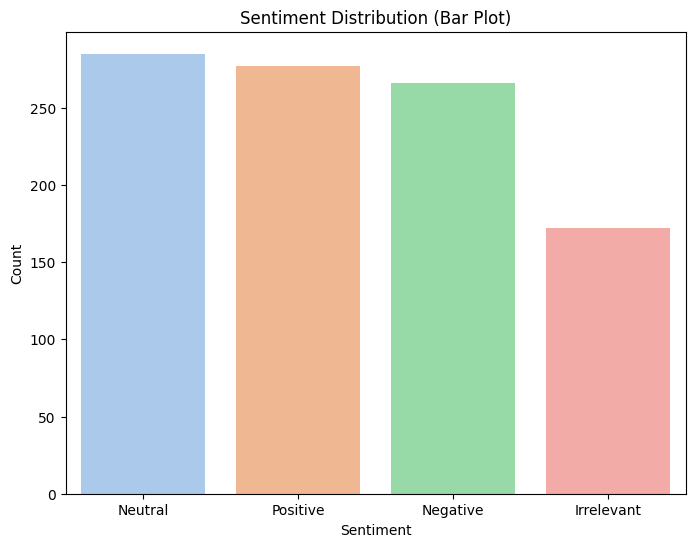

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your sentiment column is named 'Sentiment'
sentiment_counts = df_validation['Sentiment'].value_counts()

# Choose a palette with fewer colors (e.g., "pastel" with 4 colors)
colors = sns.color_palette("pastel", n_colors=len(sentiment_counts))

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, hue=sentiment_counts.index, palette=colors, dodge=False)
plt.title('Sentiment Distribution (Bar Plot)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()



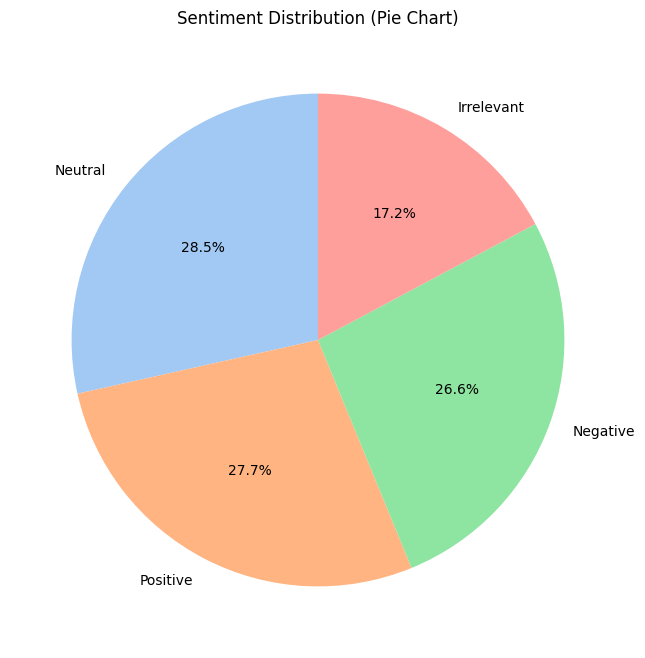

In [101]:
import matplotlib.pyplot as plt

# Assuming your sentiment column is named 'Sentiment'
sentiment_counts = df_validation['Sentiment'].value_counts()

# Define a color palette (you can choose your own colors)
colors = sns.color_palette("pastel")

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Sentiment Distribution (Pie Chart)')
plt.show()


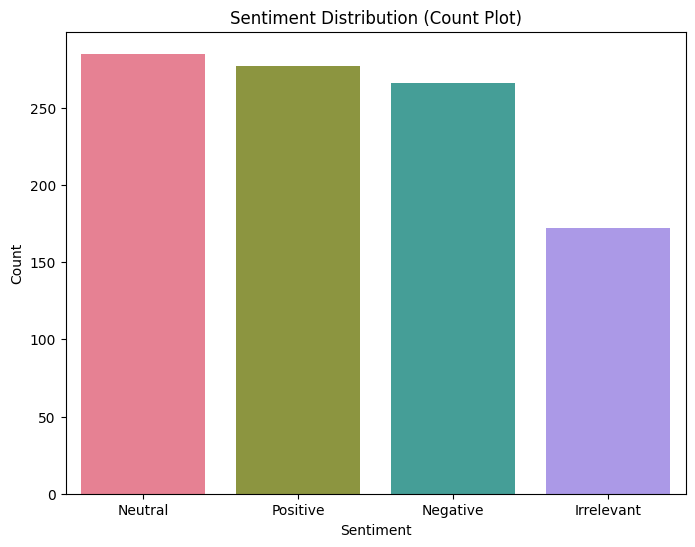

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your sentiment column is named 'Sentiment'
sentiment_counts = df_validation['Sentiment'].value_counts()

# Get a list of different colors
colors = sns.color_palette("husl", n_colors=len(sentiment_counts))

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, hue=sentiment_counts.index, palette=colors, dodge=False)
plt.title('Sentiment Distribution (Count Plot)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()



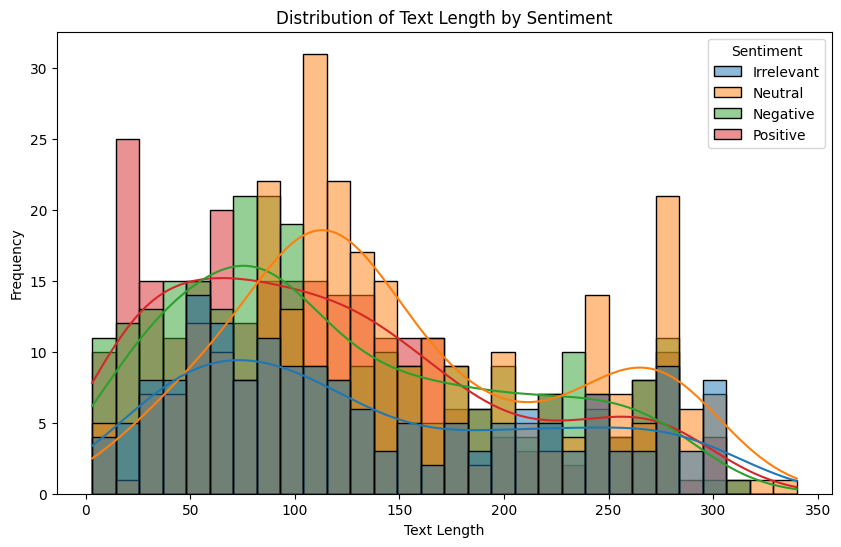

In [118]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_validation, x=df_validation['Text'].apply(len), hue='Sentiment', bins=30, kde=True)
plt.title('Distribution of Text Length by Sentiment')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


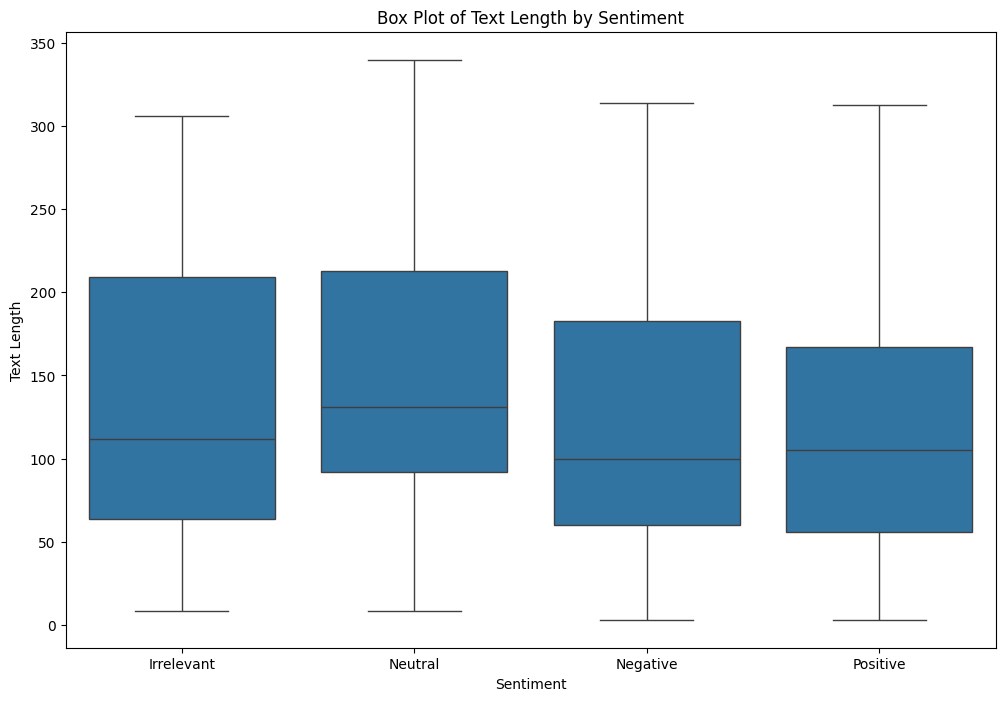

In [127]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Sentiment', y=df_validation['Text'].apply(len), data=df_validation)
plt.title('Box Plot of Text Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.show()


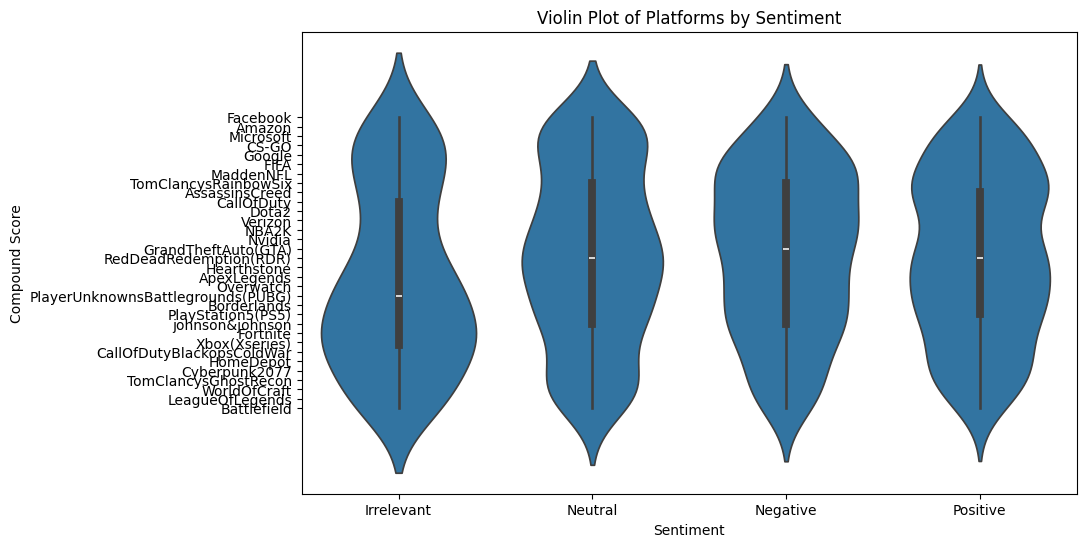

In [129]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sentiment', y='Platform', data=df_validation)
plt.title('Violin Plot of Platforms by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Compound Score')
plt.show()



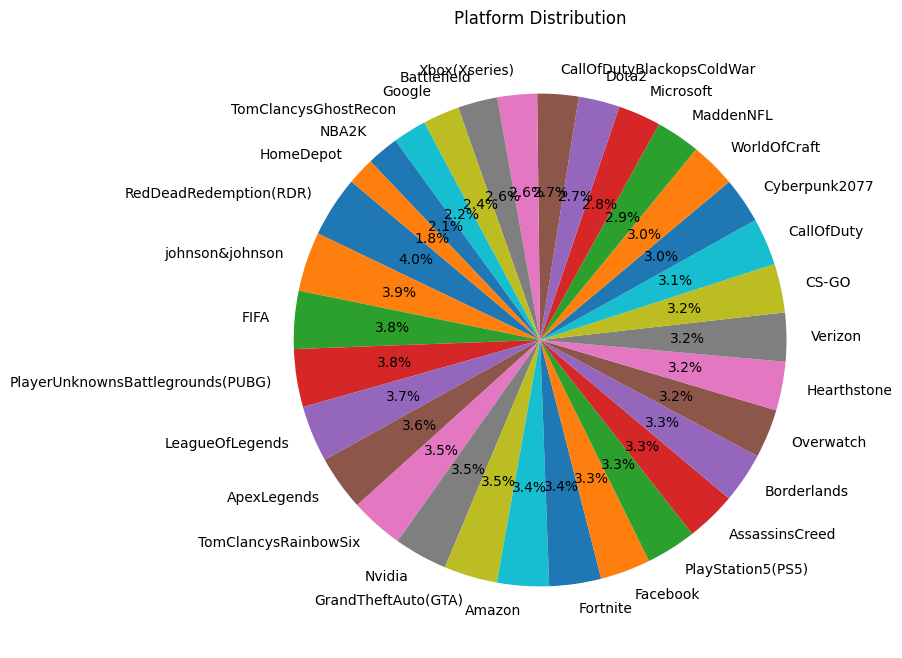

In [132]:
sentiment_counts = df_validation['Platform'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Platform Distribution')
plt.show()


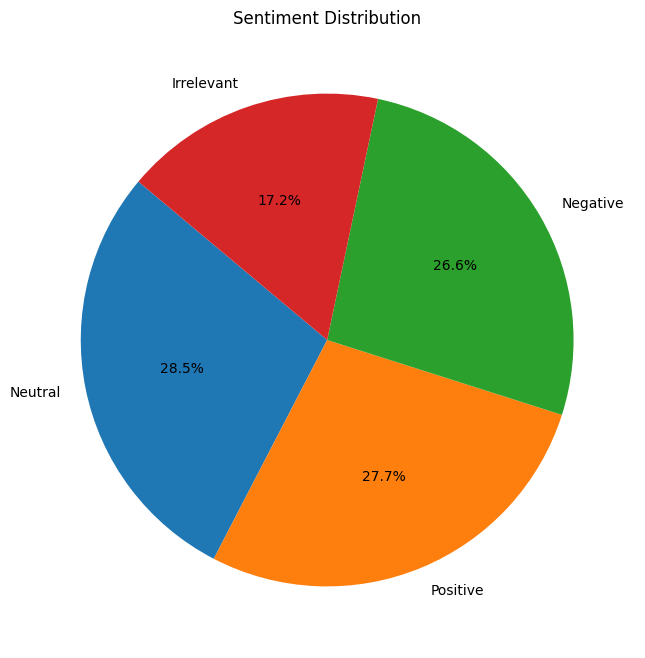

In [133]:
sentiment_counts = df_validation['Sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()
